In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn
import warnings
warnings.filterwarnings("ignore")
import random
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
el_prop = pd.read_excel("Data/Elemental_properties.xlsx")
el_prop.set_index("M", inplace=True)
props = el_prop.columns.to_list()
mp_data = pd.read_csv("Data/MP_Data.csv")

mp_data["P"] = 0
for i in range(len(mp_data)):
    if mp_data["Phase"][i] == "Cubic":
        mp_data["P"][i] = 1

    elif mp_data["Phase"][i] == "Tetragonal":
        mp_data["P"][i] = 2

    elif mp_data["Phase"][i] == "Orthorhombic":
        mp_data["P"][i] = 3

    elif mp_data["Phase"][i] == "Hexagonal" or mp_data["Phase"][i] == "Trigonal":
        mp_data["P"][i] = 4

    else:
        pass

rfr_train = mp_data.copy()
for i in range(len(mp_data)):
    if rfr_train["P"][i] == 0:
        rfr_train.drop(index=i, inplace=True)

rfr_train.reset_index(inplace=True)

rfr_train = rfr_train[['Formula',
       'Decomposition Energy', 'Band Gap', 'A_Ion_rad', 'A_BP', 'A_MP', 'A_Density', 'A_At_wt',
       'A_Elec_Aff', 'A_Ion_Energy', 'A_Heat_fusion', 'A_Heat_vap',
       'A_Electronegativity', 'A_At_num', 'A_Period', 'B_Ion_rad', 'B_BP',
       'B_MP', 'B_Density', 'B_At_wt', 'B_Elec_Aff', 'B_Ion_Energy',
       'B_Heat_fusion', 'B_Heat_vap', 'B_Electronegativity', 'B_At_num',
       'B_Period', 'X_Ion_rad', 'X_BP', 'X_MP', 'X_Density', 'X_At_wt',
       'X_Elec_Aff', 'X_Ion_Energy', 'X_Heat_fusion', 'X_Heat_vap',
       'X_Electronegativity', 'X_At_num', 'X_Period', 'P', 'A Site', 'B Site', 'X Site']]

rfr_train.columns = ["Formula", 'Decomp', 'Gap', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period', 'Phase', 'A Site', 'B Site', 'X Site']

from collections import Counter
a = rfr_train["A Site"]
b = rfr_train["B Site"]
x = rfr_train["X Site"]

a_site = list(Counter(a).keys())
b_site = list(Counter(b).keys())
x_site = list(Counter(x).keys())

for i in a_site:
    rfr_train[i] = 0
for i in b_site:
    rfr_train[i] = 0
for i in x_site:
    rfr_train[i] = 0

for k in range(len(a)):
    rfr_train.loc[k, a[k]] = 1
for k in range(len(b)):
    rfr_train.loc[k, b[k]] = 1
for k in range(len(x)):
    rfr_train.loc[k, x[k]] = 1

for i in range(len(rfr_train)):
    if rfr_train.loc[i, 'Gap'] == 0:
        rfr_train.loc[i, 'Gap_label'] = 0
    else:
        rfr_train.loc[i, 'Gap_label'] = 1
        
rfr_train

,Formula,Decomp,Gap,A_ion_rad,A_BP,A_MP,A_dens,A_at_wt,A_EA,A_IE,...,V,Ga,Zn,Se,C,Br,I,Cl,F,Gap_label
0,CaInBr3,-2.686631,2.8725,1.00,1757,1112.00,1.55,40.078,-156.0,589.8,...,0,0,0,0,0,1,0,0,0,1.0
1,CaInI3,-2.209503,2.7835,1.00,1757,1112.00,1.55,40.078,-156.0,589.8,...,0,0,0,0,0,0,1,0,0,1.0
2,CaTlBr3,-0.150481,3.7234,1.59,1746,577.00,11.85,204.383,30.0,589.3,...,0,0,0,0,0,1,0,0,0,1.0
3,CaTlCl3,-0.536004,3.9835,1.59,1746,577.00,11.85,204.383,30.0,589.3,...,0,0,0,0,0,0,0,1,0,1.0
4,CaTlF3,-0.098648,4.4564,1.59,1746,577.00,11.85,204.383,30.0,589.3,...,0,0,0,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,TlSnI3,-0.060760,1.8624,1.59,1746,577.00,11.85,204.383,30.0,589.3,...,0,0,0,0,0,0,1,0,0,1.0
346,TlVCl3,0.154704,0.2734,1.59,1746,577.00,11.85,204.383,30.0,589.3,...,1,0,0,0,0,0,0,1,0,1.0
347,TlZnF3,-0.212541,3.9179,1.59,1746,577.00,11.85,204.383,30.0,589.3,...,0,0,1,0,0,0,0,0,1,1.0
348,ZnAgF3,0.267859,1.5852,1.15,2436,1235.08,10.50,107.868,125.7,731.0,...,0,0,1,0,0,0,0,0,1,1.0


In [3]:
def outliers(X, predictions, trueval, t):
    l = []
    j = X.reset_index()
    trueval = trueval.values.tolist()
    for i in range(len(X)):
        if abs(trueval[i][0] - predictions[i]) > t:
            l.append(j.loc[i, 'index'])
    return l

In [29]:
def RFR_Decomp(dataset, features):
    label = ['Decomp']
    X = dataset[features]
    y = dataset[label]

    X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)

    param_grid = {}
    rand_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
    rand_search.fit(X_true_train, y_true_train)
    rfr_decomp = rand_search.best_estimator_
    #print('Best hyperparameters:',  rand_search.best_params_)
    rfr_decomp.fit(X_true_train, y_true_train)
    Pred_train = rfr_decomp.predict(X_true_train)
    Pred_test = rfr_decomp.predict(X_true_test)

    Pred_decomp_train = np.array(Pred_train, dtype="float32")
    Pred_decomp_test = np.array(Pred_test, dtype="float32")
    x = outliers(X_true_train, Pred_decomp_train, y_true_train, 0.8)
    xx = outliers(X_true_test, Pred_decomp_test, y_true_test, 0.8)
    inds = x + xx
    dataset1 = dataset.copy()
    for i in inds:
        dataset1.drop(i, axis=0, inplace=True)

    mae_high = []
    for i in range(len(inds)):
        mae_high.append([dataset.loc[inds[i], 'Formula'], dataset.loc[inds[i], 'Phase']])
    
    #print("Compounds with high MAE: ", mae_high)

    X = dataset1[features]
    y = dataset1[label]

    X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)


    rand_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
    rand_search.fit(X_true_train, y_true_train)
    rfr_decomp = rand_search.best_estimator_
    #print('Best hyperparameters:',  rand_search.best_params_)
    rfr_decomp.fit(X_true_train, y_true_train)
    Pred_train = rfr_decomp.predict(X_true_train)
    Pred_test = rfr_decomp.predict(X_true_test)

    Pred_decomp_train = np.array(Pred_train, dtype="float32")
    Pred_decomp_test = np.array(Pred_test, dtype="float32")

    rmse_test_decomp = np.sqrt( sklearn.metrics.mean_squared_error(y_true_test, Pred_decomp_test) )
    rmse_train_decomp = np.sqrt( sklearn.metrics.mean_squared_error(y_true_train, Pred_decomp_train) )
    print("Test/Train RMSE for Decomp:", rmse_test_decomp, rmse_train_decomp)
    plt.scatter(y_true_test, Pred_decomp_test, s = 100, c="dodgerblue", edgecolors='dimgrey')
    plt.scatter(y_true_train, Pred_decomp_train, s = 100, c="mediumpurple", edgecolors='dimgrey')
    plt.plot( [-3,4],[-3,4], c="black")
    plt.ylabel("Predicted Decomposition Energy")
    plt.xlabel("Ground Truth")
    plt.xlim([-2, 3.6])
    plt.ylim([-2, 3.6])
    plt.legend(["Test", "Train"])
    #plt.savefig(path2)
    plt.show()
    return rfr_decomp

In [30]:
def RFC_Gap(dataset, features):
    label = ['Gap_label']
    X = dataset[features]
    y = dataset[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    param_dist = {'n_estimators': randint(50,500),
                'max_depth': randint(1,20)}
    rf = RandomForestClassifier()
    rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=5, 
                                    cv=5)
    rand_search.fit(X_train, y_train)
    best_rf = rand_search.best_estimator_
    print('Best hyperparameters:',  rand_search.best_params_)
    y_pred = best_rf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

In [31]:
def RFR_Gap(dataset, features):
    label = ['Gap']
    X = dataset[features]
    y = dataset[label]

    X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)

    param_grid = {}
    rand_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
    rand_search.fit(X_true_train, y_true_train)
    rfr_gap = rand_search.best_estimator_
    #print('Best hyperparameters:',  rand_search.best_params_)
    rfr_gap.fit(X_true_train, y_true_train)
    Pred_train = rfr_gap.predict(X_true_train)
    Pred_test = rfr_gap.predict(X_true_test)

    Pred_gap_train = np.array(Pred_train, dtype="float32")
    Pred_gap_test = np.array(Pred_test, dtype="float32")

    x = outliers(X_true_train, Pred_gap_train, y_true_train, 0.8)
    xx = outliers(X_true_test, Pred_gap_test, y_true_test, 0.8)
    inds = x + xx
    dataset1 = dataset.copy()
    for i in inds:
        dataset1.drop(i, axis=0, inplace=True)

    mae_high = []
    for i in range(len(inds)):
        mae_high.append([dataset.loc[inds[i], 'Formula'], dataset.loc[inds[i], 'Phase']])
    
    #print("Compounds with high MAE: ", mae_high)

    label = ['Gap']
    X = dataset1[features]
    y = dataset1[label]

    X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)

    rand_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
    rand_search.fit(X_true_train, y_true_train)
    rfr_gap = rand_search.best_estimator_
    #print('Best hyperparameters:',  rand_search.best_params_)
    rfr_gap.fit(X_true_train, y_true_train)
    Pred_train = rfr_gap.predict(X_true_train)
    Pred_test = rfr_gap.predict(X_true_test)

    Pred_gap_train = np.array(Pred_train, dtype="float32")
    Pred_gap_test = np.array(Pred_test, dtype="float32")

    rmse_test_gap = np.sqrt( sklearn.metrics.mean_squared_error(y_true_test, Pred_gap_test) )
    rmse_train_gap = np.sqrt( sklearn.metrics.mean_squared_error(y_true_train, Pred_gap_train) )
    print("Test/Train RMSE for Band Gap Energy:", rmse_test_gap, rmse_train_gap)
    plt.scatter(y_true_test, Pred_gap_test, s = 100, c="dodgerblue", edgecolors='dimgrey')
    plt.scatter(y_true_train, Pred_gap_train, s = 100, c="mediumpurple", edgecolors='dimgrey')
    plt.plot( [-0.5,6],[-0.5,6], c="black")
    plt.ylabel("Predicted Band Gap Energy")
    plt.xlabel("Ground Truth")
    plt.xlim([-0.5, 6])
    plt.ylim([-0.5, 6])
    plt.legend(["Test", "Train"])
    #plt.savefig(path2)
    plt.show()
    return rfr_gap

Multi-Fidelity Random Forest Models - Category 3 (PBE+MP Data)

In [8]:
D = pd.read_csv("C:/24'PURDUE/Perovskite_GAN/PBE_data.csv")
pbe_data = pd.DataFrame(D)
features = ['Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']

for i in range(len(pbe_data)):
    if pbe_data.loc[i, 'Gap'] == 0:
        pbe_data.loc[i, 'Gap_label'] = 0
    else:
        pbe_data.loc[i, 'Gap_label'] = 1

df = pd.concat([pbe_data[features + ['Decomp', 'Gap', 'Gap_label', 'Formula']], rfr_train[features + ['Decomp', 'Gap', 'Gap_label', 'Formula']]], axis=0)
df.reset_index(inplace=True)

src_th = []
for i in range(len(pbe_data)):
    src_th.append(0)
for k in range(len(rfr_train)):
    src_th.append(1)
df["Source"] = src_th
df

,index,Phase,A_ion_rad,A_BP,A_MP,A_dens,A_at_wt,A_EA,A_IE,A_hof,...,X_hof,X_hov,X_En,X_at_num,X_period,Decomp,Gap,Gap_label,Formula,Source
0,0,1,1.74,944,302.00,1.87,133.000,45.5,376.0,2.09,...,7.76,20.9000,2.66,53.0,5.0,0.108798,1.0359,1.0,CsBa_0.125Ge_0.875I_3,0
1,1,1,1.74,944,302.00,1.87,133.000,45.5,376.0,2.09,...,7.76,20.9000,2.66,53.0,5.0,0.123919,1.7481,1.0,CsBa_0.125Pb_0.875I_3,0
2,2,1,1.74,944,302.00,1.87,133.000,45.5,376.0,2.09,...,7.76,20.9000,2.66,53.0,5.0,0.153314,1.9674,1.0,CsBa_0.25Pb_0.75I_3,0
3,3,1,1.74,944,302.00,1.87,133.000,45.5,376.0,2.09,...,7.76,20.9000,2.66,53.0,5.0,0.175914,2.2825,1.0,CsBa_0.375Pb_0.625I_3,0
4,4,1,1.74,944,302.00,1.87,133.000,45.5,376.0,2.09,...,7.76,20.9000,2.66,53.0,5.0,0.204620,2.2945,1.0,CsBa_0.5Pb_0.5I_3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,345,3,1.59,1746,577.00,11.85,204.383,30.0,589.3,4.27,...,7.76,20.9000,2.66,53.0,5.0,-0.060760,1.8624,1.0,TlSnI3,1
916,346,4,1.59,1746,577.00,11.85,204.383,30.0,589.3,4.27,...,3.21,10.2000,3.16,17.0,3.0,0.154704,0.2734,1.0,TlVCl3,1
917,347,1,1.59,1746,577.00,11.85,204.383,30.0,589.3,4.27,...,0.26,3.2698,3.98,9.0,2.0,-0.212541,3.9179,1.0,TlZnF3,1
918,348,1,1.15,2436,1235.08,10.50,107.868,125.7,731.0,11.30,...,0.26,3.2698,3.98,9.0,2.0,0.267859,1.5852,1.0,ZnAgF3,1


Test/Train RMSE for Decomp: 0.18091973655150498 0.08407367515190205


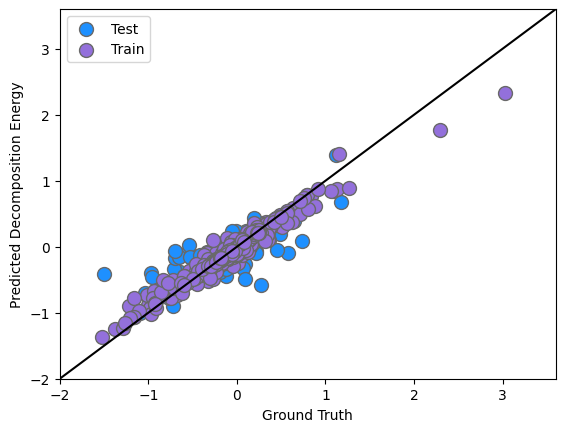

In [10]:
RFR_Decomp(df, features)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 293}
Accuracy: 0.9434782608695652


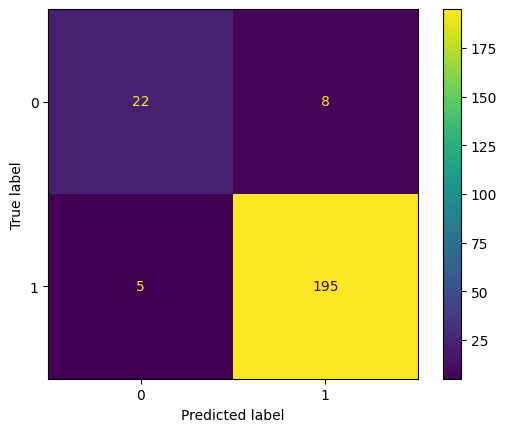

In [13]:
RFC_Gap(df, features)

Test/Train RMSE for Band Gap Energy: 0.34274062058310956 0.14767816402855524


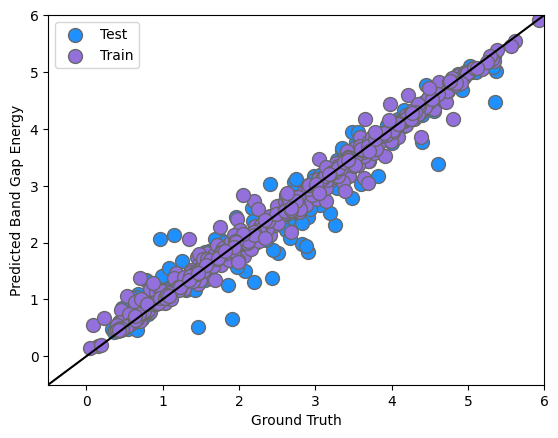

In [17]:
df_g = df.loc[ df['Gap_label']==1 ].copy()
RFR_Gap(df_g, features)

Multi-fidelity RFR Models - Category 4 (PBE+MP with prevalant species)

In [20]:
cols = ['Decomp', 'Gap', 'Phase','K', 'Rb', 'Cs', 'MA', 'FA', 'Tl', 'Ag', 'Co', 'Cu', 'In', 'Li', 'Na',
       'Cr', 'Au', 'Be', 'Cd', 'Dy', 'Eu', 'Fe', 'Hg', 'Mg', 'Mn',
       'Ni', 'Pd', 'Sc', 'Sm', 'Ti', 'Tm', 'V', 'Ga', 'Zn', 'Se',
       'C', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'F',  'A_ion_rad', 'A_BP', 'A_MP',
       'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En',
       'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens',
       'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num',
       'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA',
       'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period', 'Gap_label', 'Formula']

els = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Tl', 'Ag', 'Co', 'Cu', 'In', 'Li', 'Na',
       'Cr', 'Au', 'Be', 'Cd', 'Dy', 'Eu', 'Fe', 'Hg', 'Mg', 'Mn',
       'Ni', 'Pd', 'Sc', 'Sm', 'Ti', 'Tm', 'V', 'Ga', 'Zn', 'Se',
       'C', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'F']
pbe_formulas = pbe_data['Formula'].tolist()
mp_formulas = rfr_train['Formula'].tolist()
for axx in range(len(pbe_formulas)):
    pbe_formulas[axx] = pbe_formulas[axx].replace("_", '')
common_formulas = list(set(pbe_formulas).intersection(mp_formulas))

pbe_data['Formula'] = pbe_formulas

rfr_train_copy = rfr_train.copy()
for i in range(len(pbe_data)):
    if pbe_data.loc[i, 'Formula'] in common_formulas:
        form = pbe_data.loc[i, 'Formula']
        for k in range(len(rfr_train)):
            if rfr_train.loc[k, 'Formula'] == form:
                if pbe_data.loc[i, 'Phase'] == rfr_train.loc[k, 'Phase']:
                    rfr_train_copy.drop(index=k, inplace=True)

pbe_data['Source'] = 0
rfr_train_copy['Source'] = 1

df5 = pd.concat([pbe_data[cols + ['Source']], rfr_train_copy[cols + ['Source']]], axis=0)
df5.reset_index(inplace=True)

ind_l = []
for j in els:
    if j not in f_el:
        for i in range(len(df5)):
            if df5.loc[i, j] == 1:
                ind_l.append(i)

z = np.array(ind_l)
z = np.unique(z)
df5 = df5.drop(z, axis=0)
df5

,index,Decomp,Gap,Phase,K,Rb,Cs,MA,FA,Tl,...,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period,Gap_label,Formula,Source
0,0,0.108798,1.0359,1,0.0,0.0,1.0,0.0,0.0,0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.125Ge0.875I3,0
1,1,0.123919,1.7481,1,0.0,0.0,1.0,0.0,0.0,0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.125Pb0.875I3,0
2,2,0.153314,1.9674,1,0.0,0.0,1.0,0.0,0.0,0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.25Pb0.75I3,0
3,3,0.175914,2.2825,1,0.0,0.0,1.0,0.0,0.0,0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.375Pb0.625I3,0
4,4,0.204620,2.2945,1,0.0,0.0,1.0,0.0,0.0,0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.5Pb0.5I3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,336,0.729535,2.2566,3,0.0,0.0,0.0,0.0,0.0,1,...,324.6,1139.9,5.286,14.725,2.96,35.0,4.0,1.0,TlGeBr3,1
881,337,0.084936,1.9161,3,0.0,0.0,0.0,0.0,0.0,1,...,295.3,1008.4,7.760,20.900,2.66,53.0,5.0,1.0,TlGeI3,1
886,342,-0.622950,2.6017,3,0.0,0.0,0.0,0.0,0.0,1,...,348.8,1251.1,3.210,10.200,3.16,17.0,3.0,1.0,TlPbCl3,1
887,343,0.056845,2.1427,3,0.0,0.0,0.0,0.0,0.0,1,...,295.3,1008.4,7.760,20.900,2.66,53.0,5.0,1.0,TlPbI3,1


In [21]:
df5_g = df5.loc[ df5['Gap_label']==1 ].copy()
df5_g.reset_index(inplace=True)
for i in range(len(df5_g)):
    if df5_g.loc[i, "Gap"]>5.7:
        print(i)
        print(df5_g.loc[i, "Formula"])
        df5_g.drop(i, inplace=True)
df5_g

579
CsCaF3
594
CsSrF3
605
KCaF3
606
KCaF3
633
RbCaF3


,level_0,index,Decomp,Gap,Phase,K,Rb,Cs,MA,FA,...,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period,Gap_label,Formula,Source
0,0,0,0.108798,1.0359,1,0.0,0.0,1.0,0.0,0.0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.125Ge0.875I3,0
1,1,1,0.123919,1.7481,1,0.0,0.0,1.0,0.0,0.0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.125Pb0.875I3,0
2,2,2,0.153314,1.9674,1,0.0,0.0,1.0,0.0,0.0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.25Pb0.75I3,0
3,3,3,0.175914,2.2825,1,0.0,0.0,1.0,0.0,0.0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.375Pb0.625I3,0
4,4,4,0.204620,2.2945,1,0.0,0.0,1.0,0.0,0.0,...,295.0,1010.0,7.760,20.900,2.66,53.0,5.0,1.0,CsBa0.5Pb0.5I3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,880,336,0.729535,2.2566,3,0.0,0.0,0.0,0.0,0.0,...,324.6,1139.9,5.286,14.725,2.96,35.0,4.0,1.0,TlGeBr3,1
658,881,337,0.084936,1.9161,3,0.0,0.0,0.0,0.0,0.0,...,295.3,1008.4,7.760,20.900,2.66,53.0,5.0,1.0,TlGeI3,1
659,886,342,-0.622950,2.6017,3,0.0,0.0,0.0,0.0,0.0,...,348.8,1251.1,3.210,10.200,3.16,17.0,3.0,1.0,TlPbCl3,1
660,887,343,0.056845,2.1427,3,0.0,0.0,0.0,0.0,0.0,...,295.3,1008.4,7.760,20.900,2.66,53.0,5.0,1.0,TlPbI3,1


Test/Train RMSE for Decomp: 0.14343078364008038 0.06547865981099099


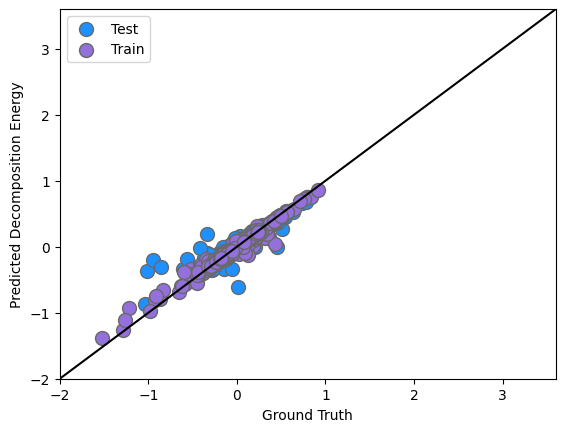

In [25]:
features = ['Phase', 'A_ion_rad', 'A_BP', 'A_MP',
       'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En',
       'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens',
       'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num',
       'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA',
       'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period', 'K', 'Rb', 'Cs', 'MA', 
       'FA', 'Tl', 'In', 'Li', 'Mn', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'F']

rfr_decomp = RFR_Decomp(df5_g, features)

Test/Train RMSE for Band Gap Energy: 0.25973017699022405 0.10605200853050019


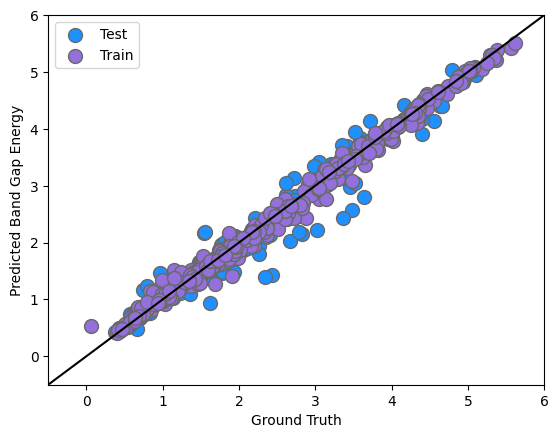

In [28]:
rfr_gap = RFR_Gap(df5_g, features)

Generating HaPs in the extended chemical space 

In [34]:
from WGAN_model import WGAN
model = WGAN(15, 54)
gen = model.train_wgan(df5_g[[ 'K', 'Rb', 'Cs', 'MA', 'FA', 'Tl', 'In', 'Li', 'Mn', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'F', 'Phase']]) 
comp_vector = model.gen_novel_comps(df5_g[[ 'K', 'Rb', 'Cs', 'MA', 'FA', 'Tl', 'In', 'Li', 'Mn', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'F', 'Phase']]) 

#Property Prediction for Novel Compositions using RFR Models
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']
X1 = comp_vector[features]

predictions = rfr_decomp.predict(X1)
comp_vector["Decomp"] = np.array(predictions, dtype="float32")

X1 = comp_vector[features + ["Decomp"]]
predictions = rfr_gap.predict(X1)
comp_vector["Gap"] = np.array(predictions, dtype="float32")

final_comps = comp_vector[comp_vector["Decomp"] < 0].copy()
print("Number of compositions with a negative decomposition energy are: ", len(final_comps))

final_comps = final_comps[final_comps["Gap"] < 2].copy()
print("Number of compositions with all properties in desired range are: ", len(final_comps))
comp_vector

Number of compositions with a negative decomposition energy are:  44168
Number of compositions with all properties in desired range are:  8146


,K,Rb,Cs,MA,FA,Tl,In,Li,Mn,Ca,...,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period,Decomp,Gap
0,0.448389,0.047923,0.201969,0.089041,0.043839,0.084963,0.083876,0.030462,0.271298,0.066488,...,75.655162,301.968904,1157.072892,4.659251,13.315958,2.938068,32.606829,3.657048,0.055798,1.982946
1,0.245464,0.086140,0.255093,0.139681,0.101744,0.040743,0.131135,0.038353,0.161090,0.170505,...,81.647301,324.615352,1234.626392,5.086303,14.558030,3.135512,35.118391,3.944762,0.049076,2.350621
2,0.521243,0.013556,0.133518,0.014966,0.073330,0.232530,0.010856,0.096032,0.252599,0.080509,...,86.633284,320.393294,1135.363996,5.619674,15.665170,2.939013,37.411350,4.125373,0.057125,2.272032
3,0.386050,0.055631,0.130329,0.058375,0.104843,0.150966,0.113806,0.006604,0.304393,0.077073,...,84.399369,304.085738,1074.201769,5.457872,15.173230,2.784193,36.373033,3.972453,0.089517,2.617361
4,0.412373,0.131169,0.057152,0.084952,0.142844,0.119497,0.052012,0.194218,0.016213,0.191679,...,71.588274,270.861798,1033.858348,4.386829,12.460678,2.629664,30.720105,3.376208,0.043348,1.816499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.272937,0.023802,0.238906,0.262745,0.041763,0.064845,0.095002,0.083860,0.036506,0.228465,...,72.735840,303.503092,1156.344619,4.565347,13.143189,2.932823,31.406659,3.596914,-0.088040,2.428659
99996,0.018252,0.224341,0.270204,0.165714,0.163681,0.010749,0.147059,0.115533,0.163587,0.239732,...,76.073766,252.414119,907.058572,4.783672,13.263820,2.344865,32.489720,3.431290,-0.005377,2.579259
99997,0.420039,0.081826,0.051463,0.076943,0.134359,0.118315,0.117056,0.019069,0.341646,0.243960,...,57.150523,250.427841,916.578788,3.722760,10.572216,2.351182,25.055347,2.937500,0.007309,3.687078
99998,0.421417,0.017231,0.190707,0.147849,0.053937,0.052517,0.116342,0.083792,0.179967,0.089780,...,79.010928,311.724153,1223.128049,4.753477,13.668116,3.089215,33.899722,3.769798,-0.044985,1.672633


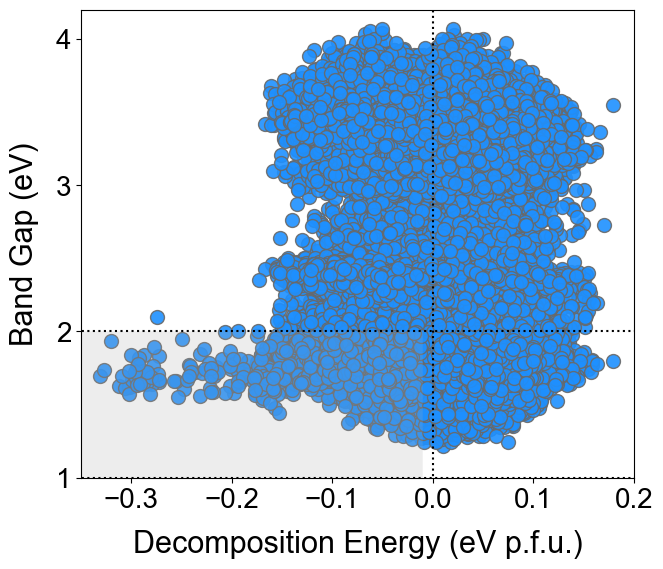

In [35]:
#Loading the 100,000 generated HaPs with predicted properties
fig = plt.figure( figsize=(7,6) )
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
plt.scatter(comp_vector.Decomp[0:len(comp_vector)], comp_vector.Gap[0:len(comp_vector)], c='dodgerblue', marker='o', s=100, edgecolors='dimgrey', alpha=0.9)

a = [1,1,1]
b = [-1000,0,1000]
c = [0,0,0]
d = [2,2,2]
plt.plot(b, a, c='k', ls=':')
plt.plot(b, d, c='k', ls=':')
plt.plot(c, b, c='k', ls=':')
x1 = np.arange(-1000, c[0],  0.01)

plt.fill_between(x1, a[0], d[0], facecolor='darkgrey', alpha=0.2)

plt.xlim([-0.35, 0.2])
plt.ylim([1.1, 4.2])
plt.xticks([-0.3, -0.2, -0.1, 0.0, 0.1, 0.2], fontsize=20, fontname = "Arial")
plt.yticks([1.0, 2.0, 3.0, 4.0], fontsize=20, fontname = "Arial")
plt.xlabel('Decomposition Energy (eV p.f.u.)', fontsize=22, labelpad=12, fontname = "Arial")
plt.ylabel('Band Gap (eV)', fontsize=22, labelpad=12, fontname = "Arial")
plt.show()

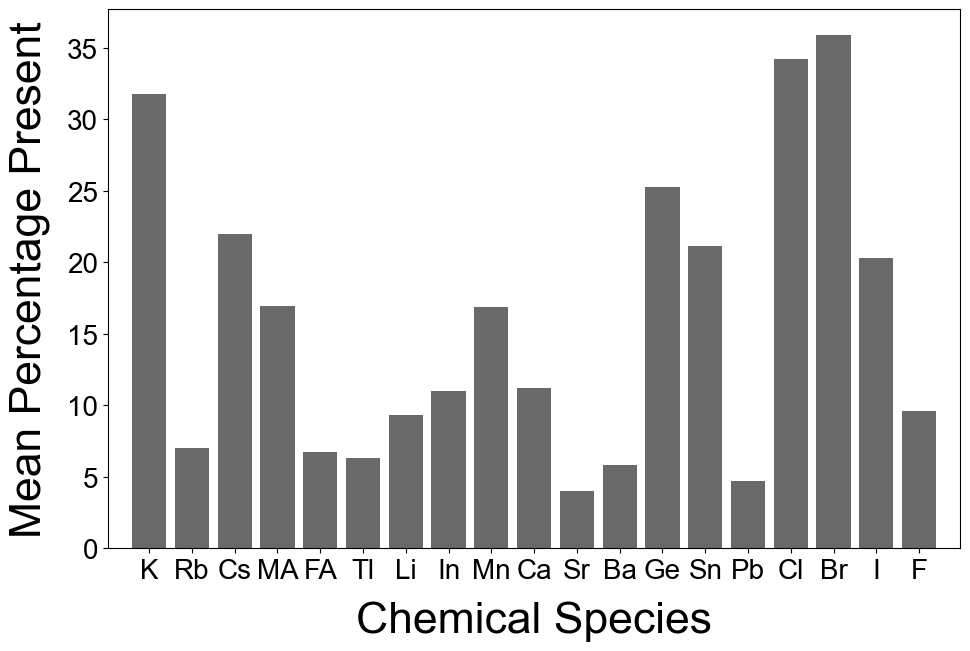

In [37]:
p = final_comps.describe()
p = p.loc["mean", "K":"F"]
el_vector = [ 'K', 'Rb', 'Cs', 'MA', 'FA', 'Tl', 'Li', 'In', 'Mn', 'Ca', 'Sr',
       'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'F']
plt.figure(figsize=(11, 7))
plt.bar(el_vector, p*100, color='dimgrey')
plt.xlabel("Chemical Species", fontsize = 32, labelpad = 12, fontname = "Arial")
plt.ylabel("Mean Percentage Present", fontsize = 32, labelpad = 12, fontname = "Arial")
plt.xticks(fontsize = 20, fontname = "Arial")
plt.yticks(fontsize = 20, fontname = "Arial")
plt.margins(x=0.03)
plt.show()